## Making a Synthetic Light Curve
Following the example on the Phoebe website!
http://phoebe-project.org/docs/2.4/examples/minimal_synthetic

Christopoulou light curve to compare to group's.

In [94]:
#imports and initialize loggers (class that code will call on?)
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True) #this sets to the default data, and can add "contact_binary=True" but not necessary
b.add_dataset('lc', times=np.linspace(0,1,201), dataset='mylc') #adding time for LC
#now we want to find a way to convert the epochs / have it start at a certain time

<ParameterSet: 80 parameters | contexts: compute, constraint, dataset, figure>

In [91]:
#alternative way to set parameters
#from https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.4/tutorials/LC_estimators.ipynb#scrollTo=vG1ehxD5qF8B

# set parameter values
b.set_value('q', value = 0.6)
b.set_value('incl', component='binary', value = 84.5)
#b.set_value('ecc', 0.2)
b.set_value('per0', 63.7)
#b.set_value('requiv', component='primary', value=1.)
#b.set_value('requiv', component='secondary', value=0.6)
b.set_value('teff', component='secondary', value=5500)

#compute the model

In [87]:
#create an empty LC dataset
#b['period@binary'] = 0.3439788 # period = 0.34 day -- USE THIS
#b['t0_supconj'] = 0.14 # primary eclipse time (zero phase) = 0.14 day -- USE THIS
#b['incl@binary'] = 89.6 # -- USE THIS
#b['Av'] = 0.179

#b['teff@primary'] = 5742 # -- USE THIS
#b['teff@secondary'] = 5600 # -- USE THIS

#b.flip_constraint('mass@primary', solve_for='sma@binary')
#b['mass@primary@component'] = 1.25
#b['q'] = 0.110 #this bitch has an error

#b['requiv@primary'] = 1.37

In [92]:
print(b.run_checks()) # check if run_compute is possible
print(b) # check full parameters; it's already close to Christopolou's values

b.run_compute(model='default')
#b.run_compute(irrad_method='none') #compute synthetics at the time provided by the default options, not sure what they mean by "synthetics" but ok

Run Checks Report: PASS

PHOEBE Bundle: 184 parameters
                        t0@system: 0.0 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.0
                        Av@system: 0.0
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary, envelope:contact_envelope)
         requiv@primary@component: 1.5 solRad
C    requiv_max@primary@component: 1.7249244031770372 solRad
C    requiv_min@primary@component: 1.425510479374591 solRad
           teff@primary@component: 6000.0 K
C          logg@primary@component: 4.186646176103011
        syncpar@primary@component: 1.0
C        period@primary@component: 0.5 d
C          freq@primary@component: 12.56637 rad / d
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...:

100%|██████████| 201/201 [00:18<00:00, 10.81it/s]


<ParameterSet: 3 parameters | qualifiers: comments, fluxes, times>

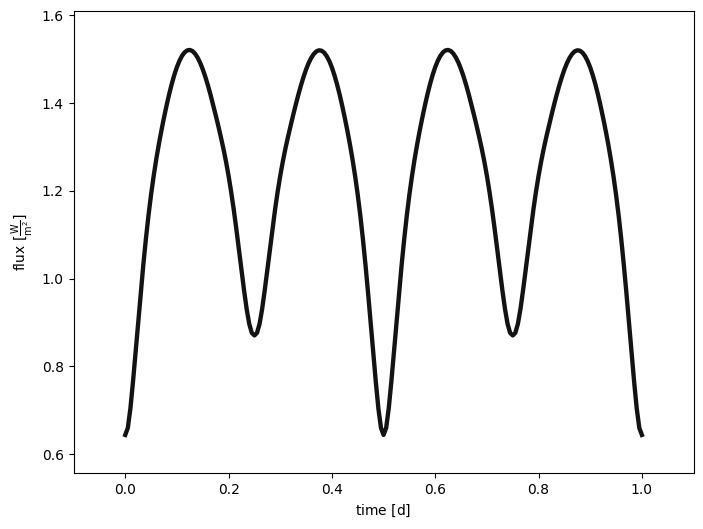

In [93]:
#plot the LC
afig, mplfig = b['mylc@model'].plot(show=True)

#plotting the flux vs. time

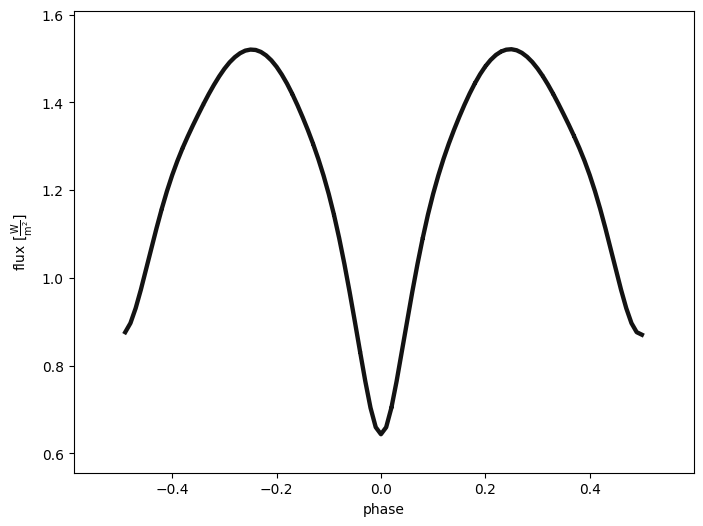

In [85]:
#phase plot
afig, mplfig = b['mylc@model'].plot(x='phases', show=True)